In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data,  columns=boston.feature_names)

In [3]:
df.insert(0, 'MEDV', boston.target)

In [4]:
df.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
df.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


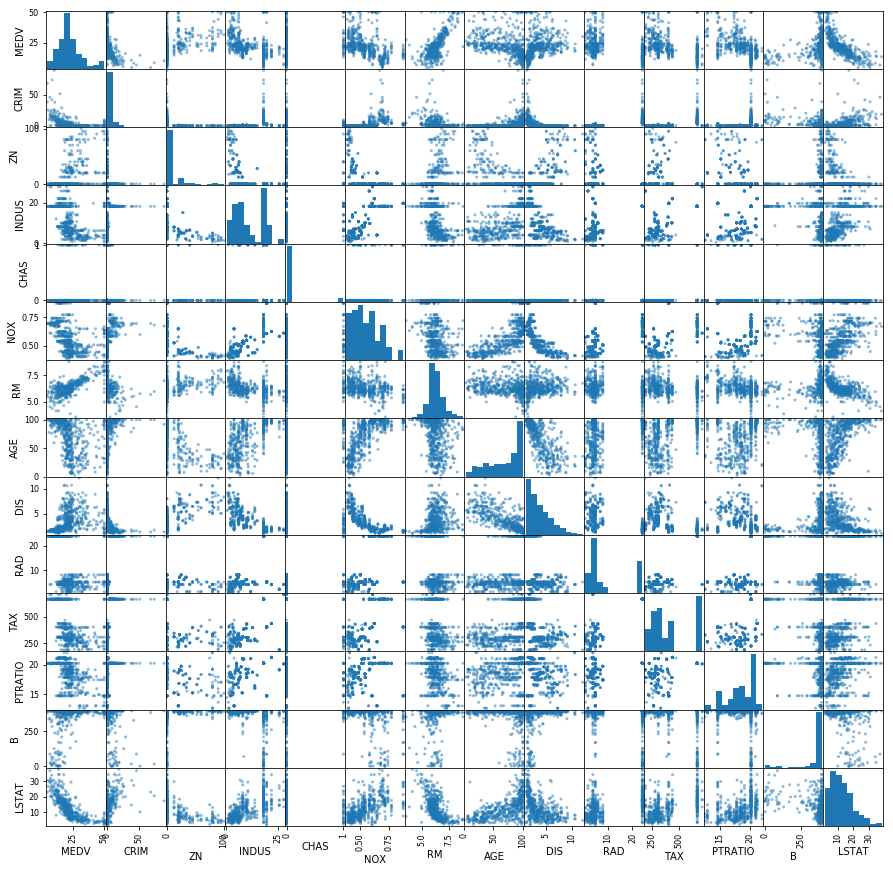

In [6]:
pd.plotting.scatter_matrix(df, figsize=(15, 15));

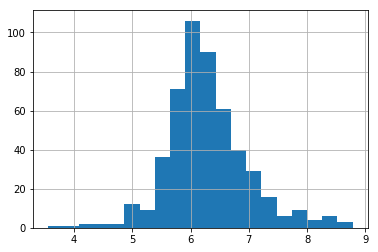

In [7]:
df['RM'].hist(bins=20);

In [8]:
df['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

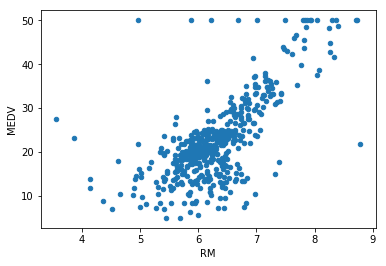

In [9]:
df.plot.scatter(x='RM',  y='MEDV');

In [10]:
from sklearn.model_selection import train_test_split
X = df.RM.to_frame()
y = df.MEDV
# 過学習を防ぐために学習データとテストデータを分けている、という説明を原稿に入れる
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
from sklearn.linear_model import LinearRegression
y = df.MEDV
lr = LinearRegression()
lr.fit(X_train, y_train)

/Users/user1/Desktop/SD_python_stat_start/env/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# テストデータを入力してスコア(決定係数)を測定する
score = lr.score(X_test, y_test)
print('スコア: {:0.3f}'.format(score))

スコア: 0.435


In [13]:
a = lr.coef_[0]
b = lr.intercept_

In [14]:
a

9.311328063251853

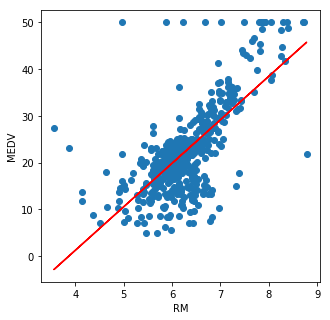

In [15]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.scatter(x=df.RM, y=df.MEDV)
x = df.RM
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
ax.plot(x, a*x+b, 'r');

In [16]:
x = 6
y = x*a+b
print('平均{}部屋の住宅価格は${:0.2f}です'.format(x, y*1000))

平均6部屋の住宅価格は$19873.62です


In [17]:
pred = lr.predict(6)
print('平均6部屋の住宅価格は${:0.2f}です'.format(pred[0]*1000))

平均6部屋の住宅価格は$19873.62です


In [18]:
# 予測
y_pred = lr.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error
 
# 平均二乗誤差    
mse = mean_squared_error(y_test, y_pred)
print('平均二乗誤差 {:0.3f}'.format(mse))

平均二乗誤差 47.033


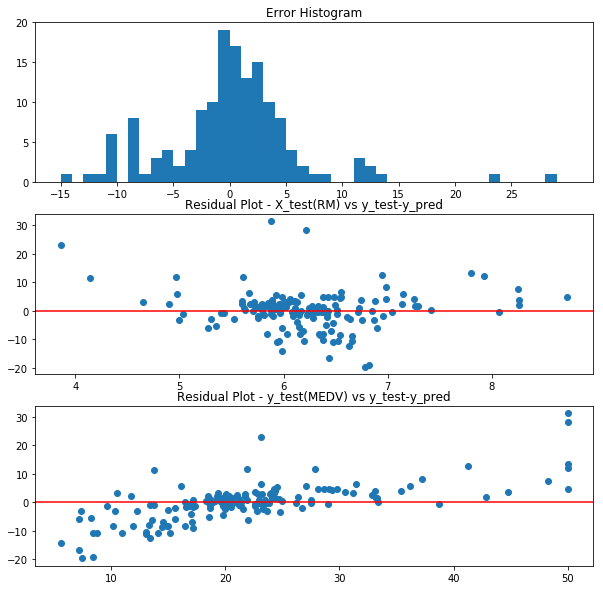

In [20]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(311)
# X軸の目盛りを設定
ax1.set_xticks(np.arange(-15, 30, 5))
ax1.set_title('Error Histogram')
# ヒストグラムがほぼ正規分布→誤差にランダムでない要素が明らかには見られない→モデルは悪くは無い
# 完全に正規分布だと誤差がすべてランダムな要素になる
ax1.hist(y_test-y_pred, range=(-15, 30), bins=45);

# 残差プロット
ax2 = fig.add_subplot(312)
ax2.set_title('Residual Plot - X_test(RM) vs y_test-y_pred')
# Y軸の0を境に分布が均等であれば予測が完璧ということになる
# 偏りが少し見られるので、モデルの改善の余地がある
ax2.scatter(x=X_test, y=y_test-y_pred)
ax2.axhline(0, color='r');

ax3 = fig.add_subplot(313)
ax3.set_title('Residual Plot - y_test(MEDV) vs y_test-y_pred')
ax3.scatter(x=y_test, y=y_test-y_pred)
ax3.axhline(0, color='r');